# Predict Customer Churn with Machine Learning and Deep Learning

## Customer Churn Analysis Objectives

Customer churn occurs when an existing customer unsubscribes from the services of a company or a service provider. It is a crucial metric that directly impacts the growth and revenue of a business. Analyzing churn rate and identifying contributing factors can provide valuable insights for stakeholders to make informed decisions.

## Objectives

1. **Determine the Churn Rate**: Calculate the churn rate, which is the proportion of customers who discontinue their subscription or service over a specified period.

2. **Identify Contributing Features**: Analyze various factors or features that may influence the churn rate. This could include demographic information, usage patterns, customer interactions, pricing strategies, etc.

## Importance

- **Business Metric**: Churn rate is a key performance indicator that reflects customer satisfaction, service quality, and overall business health. Understanding and managing churn rate is essential for sustainable growth.
  
- **Revenue Impact**: High churn rates can lead to revenue loss as it represents lost customers and potential future revenue. Identifying factors contributing to churn can help in devising strategies to retain customers and improve revenue streams.
  
- **Customer Insights**: Analyzing churn data can reveal valuable insights about customer behavior, preferences, and pain points. This understanding can guide product development, marketing strategies, and customer service initiatives.

## Analysis Approach

- **Data Collection**: Gather relevant data including customer profiles, subscription details, usage metrics, feedback, etc.
  
- **Churn Rate Calculation**: Compute the churn rate using appropriate formulas based on the chosen time period (e.g., monthly, quarterly, annually).
  
- **Feature Analysis**: Employ statistical techniques such as correlation analysis, regression, or machine learning algorithms to identify significant features impacting churn rate.
  
- **Insights Generation**: Interpret the findings to extract actionable insights for stakeholders. This may involve creating visualizations, conducting hypothesis testing, or building predictive models.

## Conclusion

Analyzing customer churn rate and its contributing factors is essential for businesses to retain customers, enhance satisfaction, and drive growth. By understanding why customers leave, companies can implement targeted strategies to mitigate churn and foster long-term customer relationships.
rate.
 rate.


## Step 1. ETL

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    log_loss,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score,
    RocCurveDisplay,
    ConfusionMatrixDisplay
)


In [12]:
df = pd.read_csv("customer_churn_dataset-training-master.csv")

## Step 2. Data quality assessment

In [13]:
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [14]:
df = df.dropna()
df = df.drop(['CustomerID'], axis=1)

In [15]:
df.shape

(440832, 11)

In [16]:
df.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [17]:
df.dtypes

Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [18]:
df.value_counts()

Age   Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  Subscription Type  Contract Length  Total Spend  Last Interaction  Churn
18.0  Female  1.0     1.0              5.0            24.0           Standard           Annual           343.46       12.0              1.0      1
45.0  Male    43.0    8.0              2.0            21.0           Premium            Monthly          879.13       12.0              1.0      1
                      7.0              4.0            14.0           Premium            Quarterly        563.33       19.0              0.0      1
                                       2.0            20.0           Basic              Annual           973.69       5.0               0.0      1
                                                      15.0           Premium            Quarterly        904.96       4.0               0.0      1
                                                                                                                           

In [19]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


## Step 3. Data Exploration

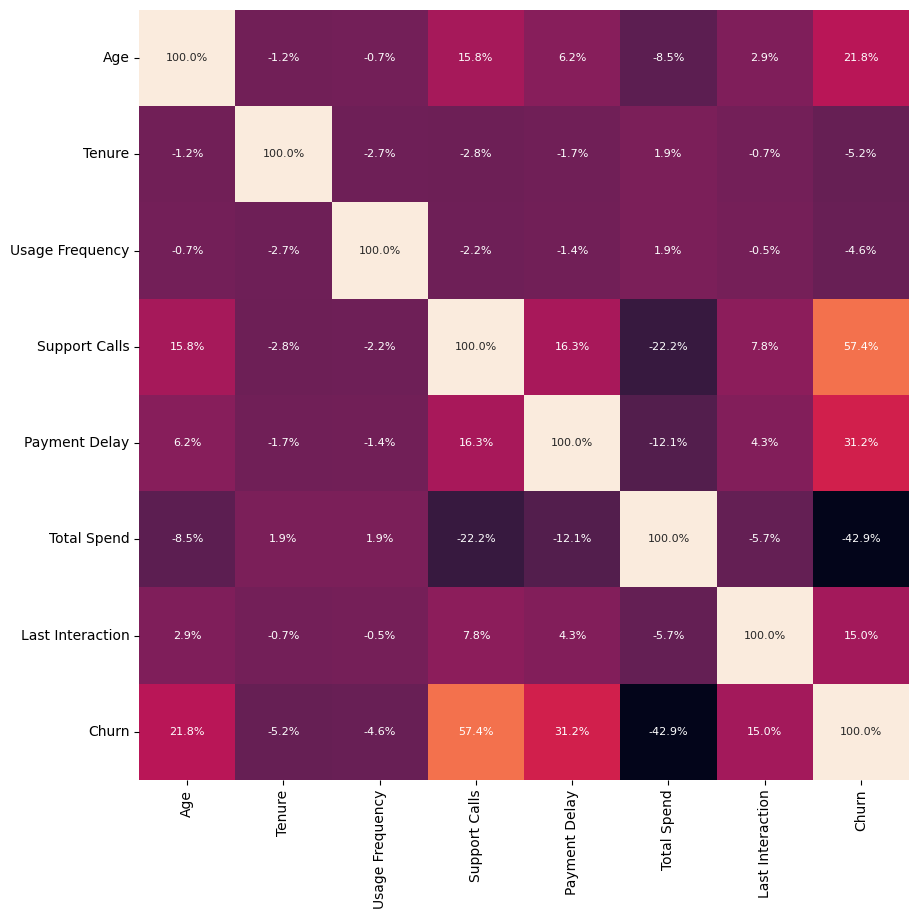

In [20]:
plt.subplots(figsize = (10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1%', square=True, cbar=False, annot_kws={'size': '8'})
plt.rcParams['font.size'] = '16'
plt.show()
sns.reset_orig()

## Step 4. Data Visualization

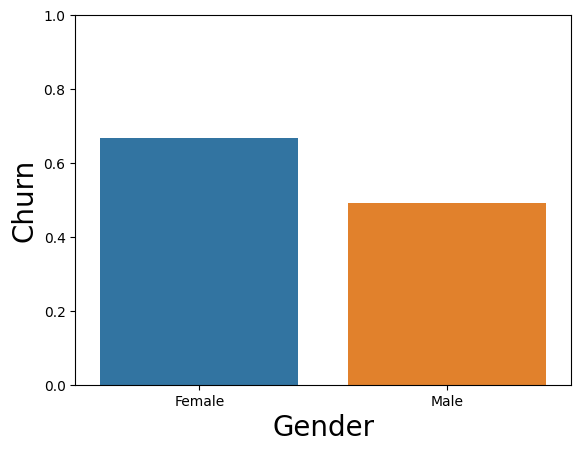

In [21]:
dd=df.groupby(['Gender'])['Churn'].mean().reset_index()

sns.barplot(y="Churn",x="Gender",data=dd)
plt.xlabel("Gender",fontsize=20)
plt.ylabel("Churn",fontsize=20)
plt.ylim(0,1)
plt.show()

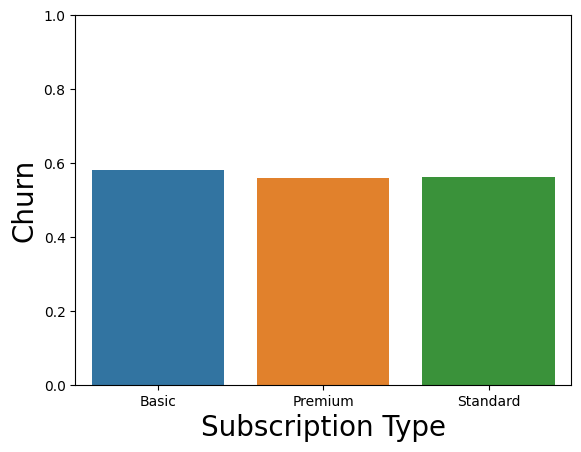

In [22]:
dd=df.groupby(['Subscription Type'])['Churn'].mean().reset_index()

sns.barplot(y="Churn",x="Subscription Type",data=dd)
plt.xlabel("Subscription Type",fontsize=20)
plt.ylabel("Churn",fontsize=20)
plt.ylim(0,1)
plt.show()

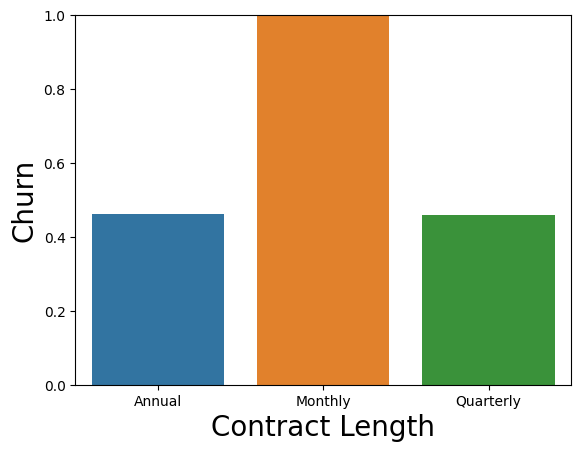

In [23]:
dd=df.groupby(['Contract Length'])['Churn'].mean().reset_index()

sns.barplot(y="Churn",x="Contract Length",data=dd)
plt.xlabel("Contract Length",fontsize=20)
plt.ylabel("Churn",fontsize=20)
plt.ylim(0,1)
plt.show()

/var/folders/xj/1xknh0xs1211__y2m1l63kz40000gn/T/ipykernel_1381/1661882974.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dd=df.groupby(['Age_binned'])['Churn'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


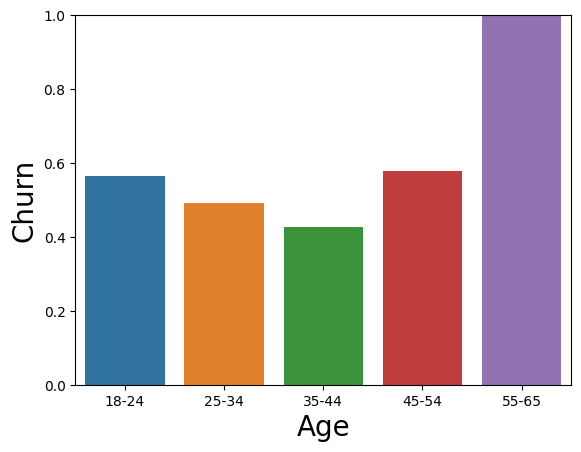

In [24]:
bins = np.array([18,25,35,45,55,65])
group_names = ['18-24','25-34','35-44','45-54','55-65']
df['Age_binned'] = pd.cut(df['Age'], bins, labels=group_names, include_lowest=True )

dd=df.groupby(['Age_binned'])['Churn'].mean().reset_index()

sns.barplot(y="Churn",x="Age_binned",data=dd)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Churn",fontsize=20)
plt.ylim(0,1)
plt.show()

/var/folders/xj/1xknh0xs1211__y2m1l63kz40000gn/T/ipykernel_1381/3390227341.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dd=df.groupby(['Tenure_binned'])['Churn'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


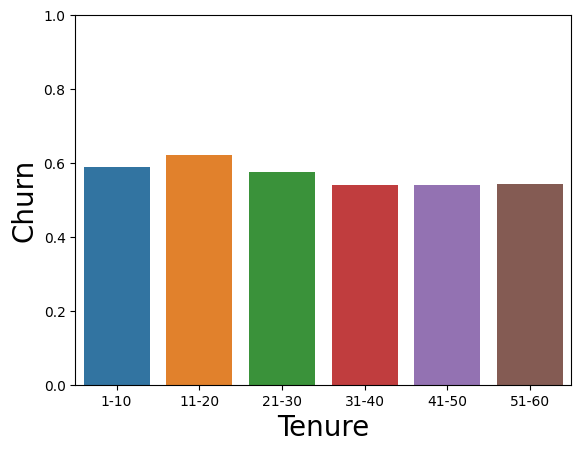

In [25]:
bins = np.array([0,10,20,30,40,50,60])
group_names = ['1-10','11-20','21-30','31-40','41-50','51-60']
df['Tenure_binned'] = pd.cut(df['Tenure'], bins, labels=group_names, include_lowest=True )

dd=df.groupby(['Tenure_binned'])['Churn'].mean().reset_index()

sns.barplot(y="Churn",x="Tenure_binned",data=dd)
plt.xlabel("Tenure",fontsize=20)
plt.ylabel("Churn",fontsize=20)
plt.ylim(0,1)
plt.show()

/var/folders/xj/1xknh0xs1211__y2m1l63kz40000gn/T/ipykernel_1381/1420837438.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dd=df.groupby(['Usage_Frequency_binned'])['Churn'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


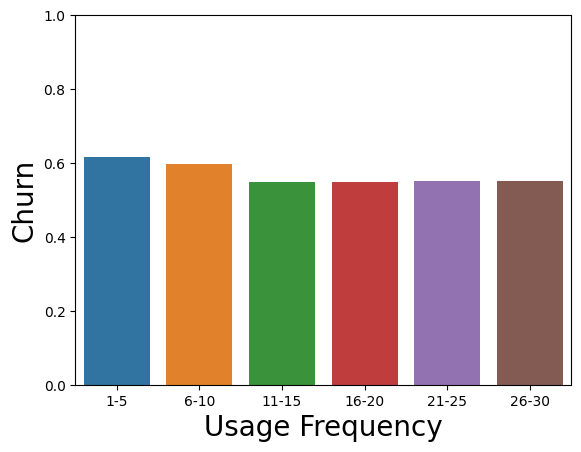

In [26]:
bins = np.array([0,5,10,15,20,25,30])
group_names = ['1-5','6-10','11-15','16-20','21-25','26-30']
df['Usage_Frequency_binned'] = pd.cut(df['Usage Frequency'], bins, labels=group_names, include_lowest=True )

dd=df.groupby(['Usage_Frequency_binned'])['Churn'].mean().reset_index()

sns.barplot(y="Churn",x="Usage_Frequency_binned",data=dd)
plt.xlabel("Usage Frequency",fontsize=20)
plt.ylabel("Churn",fontsize=20)
plt.ylim(0,1)
plt.show()

/var/folders/xj/1xknh0xs1211__y2m1l63kz40000gn/T/ipykernel_1381/4225210847.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dd=df.groupby(['Support_Calls_binned'])['Churn'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


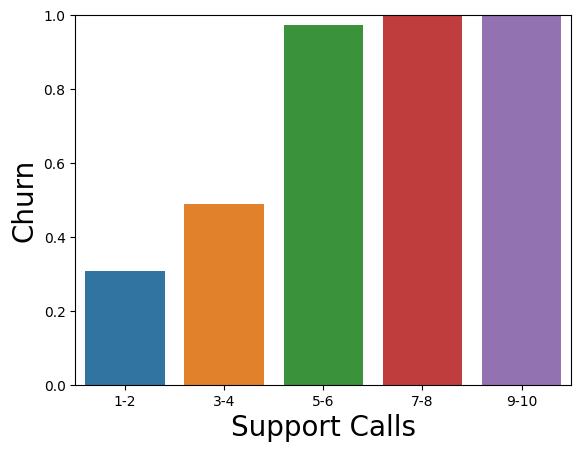

In [27]:
bins = np.array([0,2,4,6,8,10])
group_names = ['1-2','3-4','5-6','7-8','9-10']
df['Support_Calls_binned'] = pd.cut(df['Support Calls'], bins, labels=group_names, include_lowest=True )

dd=df.groupby(['Support_Calls_binned'])['Churn'].mean().reset_index()

sns.barplot(y="Churn",x="Support_Calls_binned",data=dd)
plt.xlabel("Support Calls",fontsize=20)
plt.ylabel("Churn",fontsize=20)
plt.ylim(0,1)
plt.show()

/var/folders/xj/1xknh0xs1211__y2m1l63kz40000gn/T/ipykernel_1381/1108256972.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dd=df.groupby(['Payment_Delay_binned'])['Churn'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


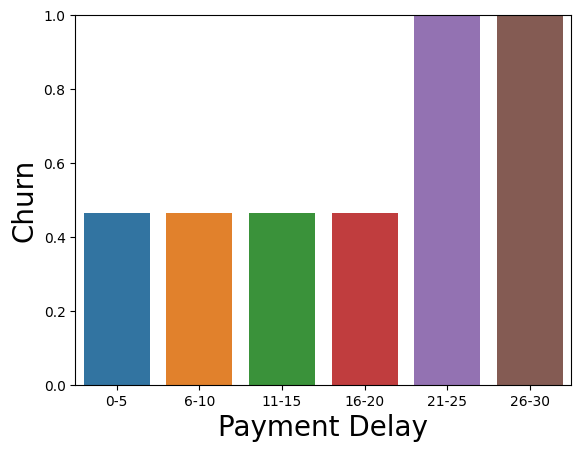

In [28]:
bins = np.array([0,5,10,15,20,25,30])
group_names = ['0-5','6-10','11-15','16-20','21-25','26-30']
df['Payment_Delay_binned'] = pd.cut(df['Payment Delay'], bins, labels=group_names, include_lowest=True )

dd=df.groupby(['Payment_Delay_binned'])['Churn'].mean().reset_index()

sns.barplot(y="Churn",x="Payment_Delay_binned",data=dd)
plt.xlabel("Payment Delay",fontsize=20)
plt.ylabel("Churn",fontsize=20)
plt.ylim(0,1)
plt.show()

/var/folders/xj/1xknh0xs1211__y2m1l63kz40000gn/T/ipykernel_1381/1103298471.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dd=df.groupby(['Total_Spend_binned'])['Churn'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


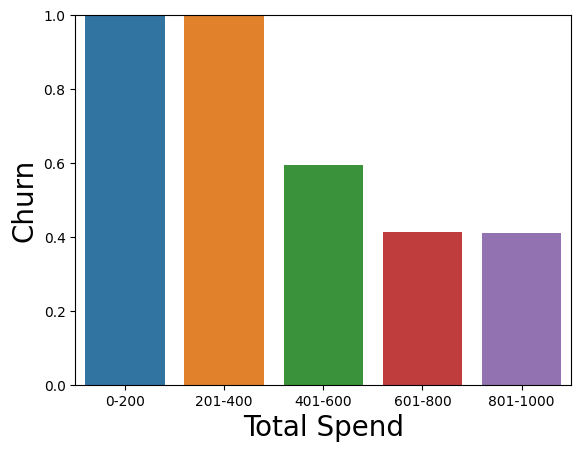

In [29]:
bins = np.array([0,200,400,600,800,1000])
group_names = ['0-200','201-400','401-600','601-800','801-1000']
df['Total_Spend_binned'] = pd.cut(df['Total Spend'], bins, labels=group_names, include_lowest=True )

dd=df.groupby(['Total_Spend_binned'])['Churn'].mean().reset_index()

sns.barplot(y="Churn",x="Total_Spend_binned",data=dd)
plt.xlabel("Total Spend",fontsize=20)
plt.ylabel("Churn",fontsize=20)
plt.ylim(0,1)
plt.show()

/var/folders/xj/1xknh0xs1211__y2m1l63kz40000gn/T/ipykernel_1381/2757301769.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dd=df.groupby(['Last_Interaction_binned'])['Churn'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


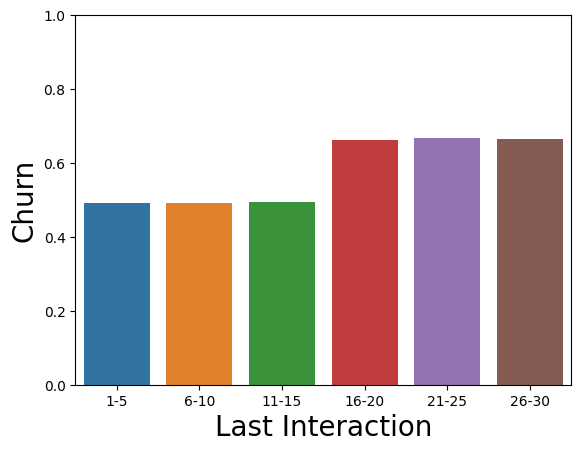

In [30]:
bins = np.array([0,5,10,15,20,25,30])
group_names = ['1-5','6-10','11-15','16-20','21-25','26-30']
df['Last_Interaction_binned'] = pd.cut(df['Last Interaction'], bins, labels=group_names, include_lowest=True )

dd=df.groupby(['Last_Interaction_binned'])['Churn'].mean().reset_index()

sns.barplot(y="Churn",x="Last_Interaction_binned",data=dd)
plt.xlabel("Last Interaction",fontsize=20)
plt.ylabel("Churn",fontsize=20)
plt.ylim(0,1)
plt.show()

## Step 5. Feature Engineering

In [31]:
df = df.drop(['Subscription Type','Tenure_binned','Usage_Frequency_binned','Support_Calls_binned','Payment_Delay_binned','Total_Spend_binned','Last_Interaction_binned'], axis=1)
df1= pd.get_dummies(df)
df1

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly,Age_binned_18-24,Age_binned_25-34,Age_binned_35-44,Age_binned_45-54,Age_binned_55-65
0,30.0,39.0,14.0,5.0,18.0,932.00,17.0,1.0,True,False,True,False,False,False,True,False,False,False
1,65.0,49.0,1.0,10.0,8.0,557.00,6.0,1.0,True,False,False,True,False,False,False,False,False,True
2,55.0,14.0,4.0,6.0,18.0,185.00,3.0,1.0,True,False,False,False,True,False,False,False,True,False
3,58.0,38.0,21.0,7.0,7.0,396.00,29.0,1.0,False,True,False,True,False,False,False,False,False,True
4,23.0,32.0,20.0,5.0,8.0,617.00,20.0,1.0,False,True,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,54.0,15.0,1.0,3.0,716.38,8.0,0.0,False,True,True,False,False,False,False,True,False,False
440829,25.0,8.0,13.0,1.0,20.0,745.38,2.0,0.0,True,False,True,False,False,True,False,False,False,False
440830,26.0,35.0,27.0,1.0,5.0,977.31,9.0,0.0,False,True,False,False,True,False,True,False,False,False
440831,28.0,55.0,14.0,2.0,0.0,602.55,2.0,0.0,False,True,False,False,True,False,True,False,False,False


## Step 6. Machine Learning Model Training and evaluation

Naive Bayes Accuracy: 0.73
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76     38167
         1.0       1.00      0.52      0.68     50000

    accuracy                           0.73     88167
   macro avg       0.81      0.76      0.72     88167
weighted avg       0.83      0.73      0.72     88167

Logistic Regression Accuracy: 0.92
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91     38167
         1.0       0.95      0.91      0.93     50000

    accuracy                           0.92     88167
   macro avg       0.92      0.92      0.92     88167
weighted avg       0.92      0.92      0.92     88167

LDA Accuracy: 0.90
Classification Report for LDA:
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90     38167
         1.0       0.98      0.85      

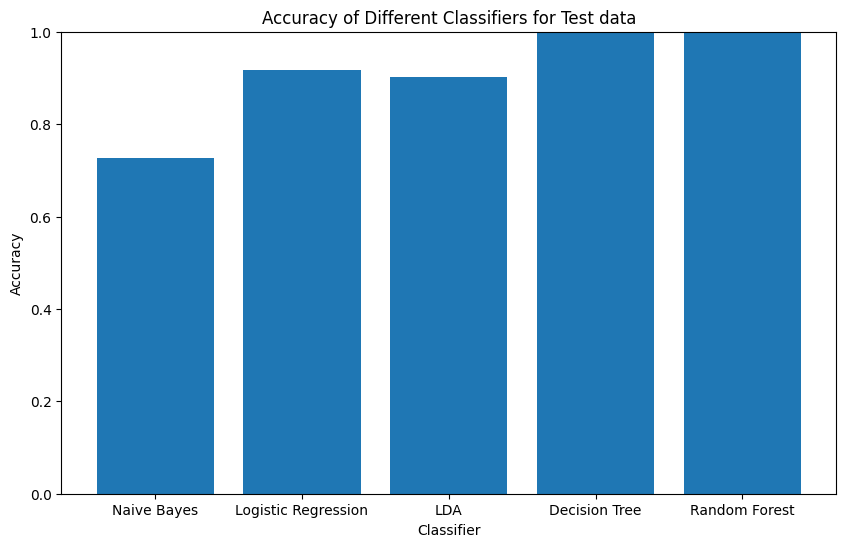

In [32]:
# Machine Learing algorithms

X = df1.drop(['Churn'], axis=1)
y = df1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

classifiers = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression' : LogisticRegression(),
    'LDA' : LinearDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

classifier_names = []
accuracies = []

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    classifier_names.append(name)
    accuracies.append(accuracy)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))  # Fixing classification report to use y_test

plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers for Test data')
plt.ylim(0, 1)
plt.show()

## Step 7.  Machine Learning Model Deployment and evaluation

Naive Bayes Deployment Accuracy: 0.56
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.59      0.53      0.56     33881
           1       0.53      0.58      0.55     30493

    accuracy                           0.56     64374
   macro avg       0.56      0.56      0.56     64374
weighted avg       0.56      0.56      0.56     64374

Logistic Regression Deployment Accuracy: 0.56
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.17      0.29     33881
           1       0.52      0.99      0.68     30493

    accuracy                           0.56     64374
   macro avg       0.74      0.58      0.48     64374
weighted avg       0.75      0.56      0.47     64374

LDA Deployment Accuracy: 0.59
Classification Report for LDA:
              precision    recall  f1-score   support

           0       0.93      0.25      0.39     33881
      

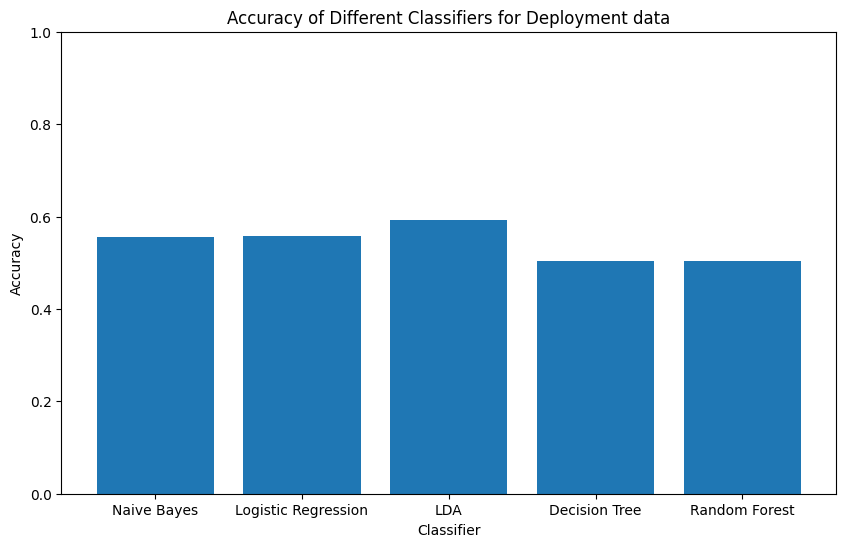

In [33]:
#Deploying model on new data
df_t = pd.read_csv("customer_churn_dataset-testing-master.csv")
df_t = df_t.dropna()
df_t = df_t.drop(['CustomerID','Subscription Type'], axis=1)
bins = np.array([18,25,35,45,55,65])
group_names = ['18-24','25-34','35-44','45-54','55-65']
df_t['Age_binned'] = pd.cut(df_t['Age'], bins, labels=group_names, include_lowest=True )
df2= pd.get_dummies(df_t)

X_test_new = df2.drop(['Churn'], axis=1)
X_test_new = scaler.transform(X_test_new)
y_test_new = df2['Churn']

classifier_names = []
accuracies = []
for name, clf in classifiers.items():
    y_pred_new = clf.predict(X_test_new)
    accuracy_deploy = accuracy_score(y_test_new, y_pred_new)
    print(f"{name} Deployment Accuracy: {accuracy_deploy:.2f}")
    classifier_names.append(name)
    accuracies.append(accuracy_deploy)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test_new, y_pred_new)) 
    
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers for Deployment data')
plt.ylim(0, 1)
plt.show()

## Step 8: Determining Contributing Features of Churn

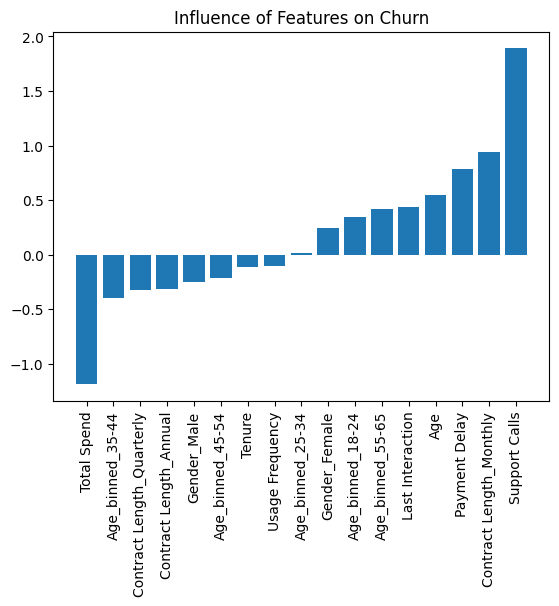

In [34]:
model_2 = LinearDiscriminantAnalysis()

model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_test)

feature_importances = pd.DataFrame(data={"Feature": X.columns, "Importance": model_2.coef_[0]}).sort_values(by='Importance')
plt.bar(feature_importances["Feature"], feature_importances["Importance"])
plt.xticks(rotation=90)
plt.title("Influence of Features on Churn")
plt.show()

In [35]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not churn', 'churned']); ax.yaxis.set_ticklabels(['did not churn', 'churned']) 
    plt.show() 

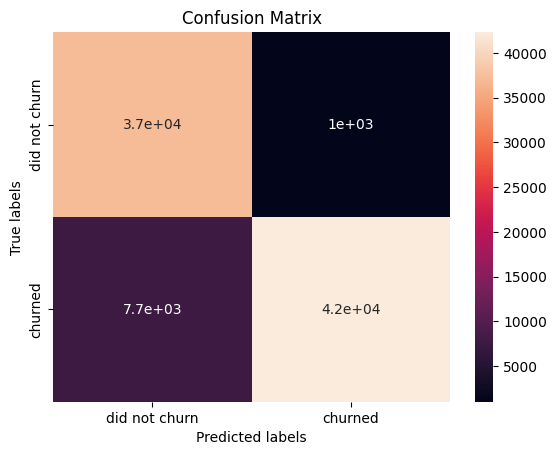

In [36]:
plot_confusion_matrix(y_test,y_pred)

## Step 9. Deep Learning Model Training, Deployment and Evaluation

In [37]:
# Deep Learning Algorithm 
# Feed forward neural network 

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

num_features = 17
dl_epoch = 10
model = Sequential([
    Dense(128, activation='relu', input_shape=(num_features,)),
    Dropout(0.5), 
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=dl_epoch, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Deploy model 
deploy_loss, deploy_accuracy = model.evaluate(X_test_new, y_test_new)
print(f'Deployment Loss: {deploy_loss}, Deployment Accuracy: {deploy_accuracy}')



Epoch 1/10


2024-03-27 07:17:36.987217: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


8817/8817 [==============================] - 7s 762us/step - loss: 0.0746 - accuracy: 0.9743 - val_loss: 0.0308 - val_accuracy: 0.9910
Epoch 2/10
8817/8817 [==============================] - 6s 731us/step - loss: 0.0373 - accuracy: 0.9890 - val_loss: 0.0276 - val_accuracy: 0.9924
Epoch 3/10
8817/8817 [==============================] - 6s 730us/step - loss: 0.0333 - accuracy: 0.9902 - val_loss: 0.0235 - val_accuracy: 0.9939
Epoch 4/10
8817/8817 [==============================] - 6s 723us/step - loss: 0.0306 - accuracy: 0.9912 - val_loss: 0.0203 - val_accuracy: 0.9940
Epoch 5/10
8817/8817 [==============================] - 6s 730us/step - loss: 0.0285 - accuracy: 0.9917 - val_loss: 0.0195 - val_accuracy: 0.9945
Epoch 6/10
8817/8817 [==============================] - 6s 733us/step - loss: 0.0268 - accuracy: 0.9923 - val_loss: 0.0194 - val_accuracy: 0.9949
Epoch 7/10
8817/8817 [==============================] - 6s 728us/step - loss: 0.0257 - accuracy: 0.9927 - val_loss: 0.0191 - val_accura

## Step 10. Final Result

1. **Churn Rate**: The churn rate of the deployment data set was found to be **47.37%** and the churn rate of the training data set was **56.71%**. From the multiple Machine Learning Models that were trained, Linear Discriminant Analysis(LDA) proved to be he most successful model with an accuracy of **0.59**. A Deep Learning Algorithm was also used, specifically a feed forward neural network, which had an accuracy of **0.507**   

2. **Identify Contributing Features**: After analyzing various factors or features that influence the churn rate we determined that some featues have a positive efffect toward Churn rate and some had a negative effecet.
 - **Positive effect**
     - Number of support calls
     - Customers with monthly contracts
     - Customers with a Payment delay
 - **Negative effect**
     - Total money spent
     - Customers in age group 35-44
     - Customers with a quarterly contract length
 

